#### Importing
* np for linear algebra
* pd for csv I/O
* plt, sns for graphs and plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* os.walk() o/p give a tuple of curr. dir, child dirs, and filenames

In [2]:
for dirname, dirnames, filenames in os.walk(os.path.join(os.getcwd(),"input")):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Users\ruchi\OneDrive\Documents\Ruchir\git\kaggle\titanic\input\gender_submission.csv
c:\Users\ruchi\OneDrive\Documents\Ruchir\git\kaggle\titanic\input\test.csv
c:\Users\ruchi\OneDrive\Documents\Ruchir\git\kaggle\titanic\input\train.csv


* Importing train and test data in  separate pd DF

In [3]:
training = pd.read_csv(r'c:\\Users\\ruchi\\OneDrive\\Documents\\Ruchir\\git\\kaggle\\titanic\\input\\train.csv')
test = pd.read_csv(r'input\\test.csv')

* new column 'train_test' indicates train or test
* Ground truth 'Survived' for test is hidden with NaN's
* all_data stores everything together(y??)

In [4]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

In [5]:
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

#### Ideate
* Put ur questions, thougths and approach before touching anything else:
1. Use .info() and .describe()
2. There are 9 variables in total, categorize them: numerical, categorical, ordinal.
3. Draw correlation matrices among the numeric variables.
4. Clean the data (NaN's, null, 0's)
5. Explore qualitative themes:
    * Rich people had more accessible rescue?
    * Age and gender (women and children first?)
6. Which model to use?

#### Premilinary Data exploration
1. Numeric data: Make hists, corrplot, pivot table compare survival rate for each numeric variable.
2. Categorical data: Bar charts to understand the balance, pivot tables.

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [7]:
training.dtypes.value_counts()

int64      6
object     5
float64    2
dtype: int64

* Notes:
1. Entries: 891
2. Numeric data: 8
3. Categorical Data: 5

In [8]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


* Drop PassengerId cuz no information comes from it??
* Min values are misleading, could be erroneous 0 entries. Can fare be zero?

In [9]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [10]:
#Separate out num from cat cols
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

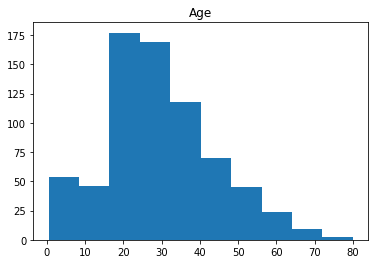

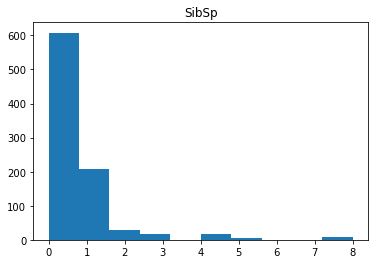

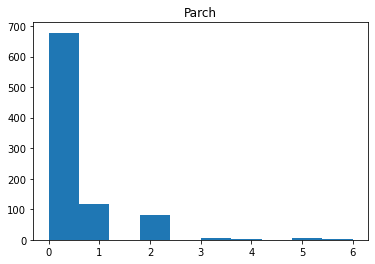

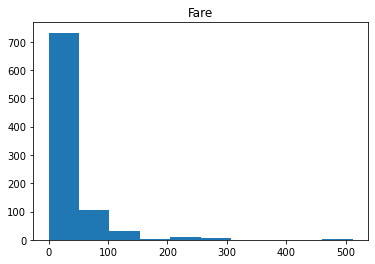

In [11]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

* Data is left skewed, non-normalized. Maybe normalize it?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

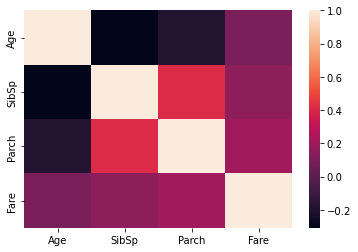

In [12]:
print(df_num.corr())
sns.heatmap(df_num.corr())